In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# 1. Загрузка данных
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster21/archive/train_dataset.csv"
test_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster21/archive/test_dataset.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [3]:
# 2. Исследовательский анализ данных (EDA)
def eda_summary(df):
    summary = pd.DataFrame({
        "missing_ratio": df.isnull().mean(),
        "min": df.min(),
        "max": df.max(),
        "mean": df.mean(),
        "median": df.median(),
        "variance": df.var(),
        "quantile_0.1": df.quantile(0.1),
        "quantile_0.9": df.quantile(0.9),
        "quartile_1": df.quantile(0.25),
        "quartile_3": df.quantile(0.75)
    })
    return summary

print("EDA Summary for Train Data")
print(eda_summary(train_data))


EDA Summary for Train Data
                     missing_ratio    min     max        mean  median  \
age                            0.0   20.0    85.0   44.127591    40.0   
height(cm)                     0.0  130.0   190.0  164.689488   165.0   
weight(kg)                     0.0   30.0   135.0   65.938718    65.0   
waist(cm)                      0.0   51.0   129.0   82.062115    82.0   
eyesight(left)                 0.0    0.1     9.9    1.014955     1.0   
eyesight(right)                0.0    0.1     9.9    1.008768     1.0   
hearing(left)                  0.0    1.0     2.0    1.025369     1.0   
hearing(right)                 0.0    1.0     2.0    1.026190     1.0   
systolic                       0.0   71.0   233.0  121.475631   120.0   
relaxation                     0.0   40.0   146.0   75.994408    76.0   
fasting blood sugar            0.0   46.0   423.0   99.342269    96.0   
Cholesterol                    0.0   55.0   445.0  196.883491   195.0   
triglyceride            

In [4]:
# 3. Обработка пропусков (если есть)
train_data = train_data.dropna()
test_data = test_data.dropna()


In [8]:
# 4. Разделение признаков и целевой переменной
X_train = train_data.drop(columns=['smoking']) # Целевая переменная - 'smoking'
y_train = train_data['smoking']
X_test = test_data  

In [9]:
# 5. Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# 6. Обучение логистической регрессии
log_reg = LogisticRegression(solver='liblinear', penalty='l1', C=1.0)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [11]:
# 7. Предсказания
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [12]:
# 8. Оценка качества модели
conf_matrix = confusion_matrix(y_train, log_reg.predict(X_train_scaled))
accuracy = accuracy_score(y_train, log_reg.predict(X_train_scaled))
precision = precision_score(y_train, log_reg.predict(X_train_scaled))
recall = recall_score(y_train, log_reg.predict(X_train_scaled))
f1 = f1_score(y_train, log_reg.predict(X_train_scaled))
roc_auc = roc_auc_score(y_train, log_reg.predict_proba(X_train_scaled)[:, 1])


In [13]:
# 9. Вывод метрик
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Confusion Matrix:
[[20096  4570]
 [ 6190  8128]]
Accuracy: 0.7240
Precision: 0.6401
Recall: 0.5677
F1 Score: 0.6017
ROC AUC: 0.8077


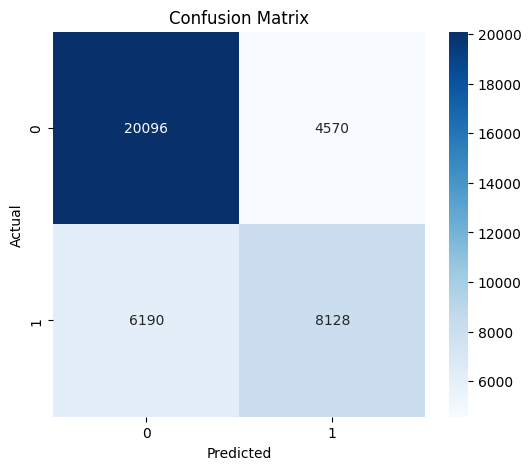

In [14]:
# 10. Визуализация матрицы ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
